In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('../datasets/raw_data/marketing_campaign.csv', sep='\t')
print(df.shape)
df.head()

(2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [23]:
df = pd.read_csv('../datasets/cleaned_data/mkt_camp_v1/train.csv')
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Response
0,-1.415546,-0.825218,-0.929894,-0.003777,-0.891280,-0.460265,-0.691069,-0.467355,-0.607273,-0.594793,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,0.477135,-0.825218,0.906934,-0.659946,0.344893,-0.284229,0.084417,2.077650,0.265004,-0.556446,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,0.787855,-0.825218,0.906934,0.341574,2.068405,-0.661449,-0.403031,-0.687068,-0.655733,-0.652312,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,-0.921223,1.032559,-0.929894,-0.210988,-0.825906,-0.661449,-0.713225,-0.687068,-0.655733,-0.805699,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,-1.910309,-0.825218,0.906934,-1.696001,-0.855622,-0.560857,-0.686637,-0.650449,-0.558813,5.310592,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,-0.326350,1.032559,0.906934,-1.108903,-0.831849,-0.636301,-0.695500,-0.650449,-0.655733,-0.767352,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1788,0.382617,-0.825218,0.906934,0.237969,-0.421772,0.595952,-0.296679,0.319948,0.071165,-0.326366,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1789,0.604571,-0.825218,0.906934,0.617856,1.518664,-0.460265,-0.504952,-0.485665,-0.655733,0.498087,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1790,-0.132999,1.032559,0.906934,-0.970762,-0.748645,-0.661449,-0.699931,-0.687068,-0.655733,-0.824872,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


# Task: predict response

In [6]:
df['Response'].value_counts()

Response
0    1906
1     334
Name: count, dtype: int64

In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [19]:
data = df
data["Age"] = 2021-data["Year_Birth"]

data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

data[['Age', 'Spent', 'Children', 'Family_Size', 'Is_Parent']]

C:\Users\JohnnyKeepWalking\AppData\Local\Temp\ipykernel_46208\3793955221.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]


,Age,Spent,Children,Family_Size,Is_Parent
0,64,1617,0,1,0
1,67,27,2,3,1
2,56,776,0,2,0
3,37,53,1,3,1
4,40,422,1,3,1
...,...,...,...,...,...
2235,54,1341,1,3,1
2236,75,444,3,5,1
2237,40,1241,0,1,0
2238,65,843,1,3,1


In [5]:
df = df[['Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']]

median_income = df['Income'].median()
df['Income'] = df['Income'].fillna(median_income)

In [6]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

encoder = OneHotEncoder(sparse_output = False)

encoded_array = encoder.fit_transform(df[['Education']])

encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Education']))

df = pd.concat([df, encoded_df], axis=1)

df = df.drop(columns=['Education'])

In [7]:
encoded_array = encoder.fit_transform(df[['Marital_Status']])

encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Marital_Status']))

df = pd.concat([df, encoded_df], axis=1)

df = df.drop(columns=['Marital_Status'])

In [8]:
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,58138.0,0,0,58,635,88,546,172,88,88,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,26646.0,1,0,26,11,4,20,10,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2236,64014.0,2,1,56,406,0,30,0,0,8,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2237,56981.0,0,0,91,908,48,217,32,12,24,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2238,69245.0,0,1,8,428,30,214,80,30,61,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Response'])
y = df['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# conf_matrix = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred)
print(f"\nROC-AUC Score: {roc_auc:.2f}")

Accuracy: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       379
           1       0.39      0.17      0.24        69

    accuracy                           0.83       448
   macro avg       0.63      0.56      0.57       448
weighted avg       0.79      0.83      0.80       448


ROC-AUC Score: 0.56


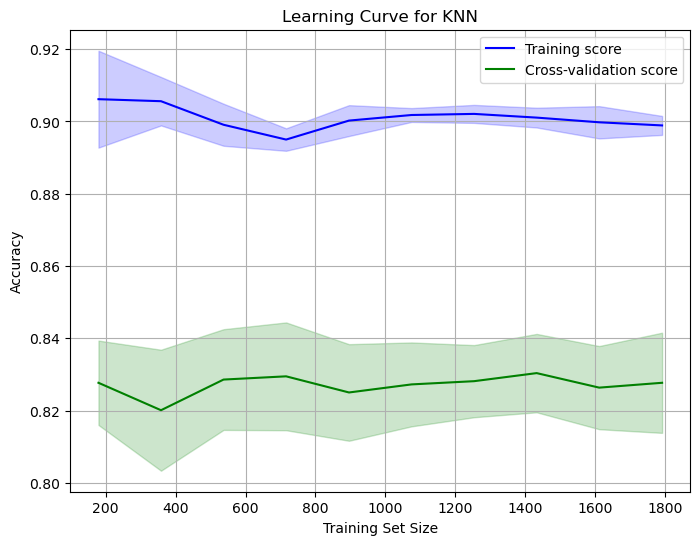

In [12]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    knn, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and std of scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label="Training score", color="blue")
plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    color="blue",
    alpha=0.2,
)
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color="green")
plt.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    color="green",
    alpha=0.2,
)
plt.title("Learning Curve for KNN")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

### Feature Engineering
1. Adding new features; replace age and income outliers (v2)
2. Smote to address in-balance (v3)
3. Feature selection (v4)

In [13]:
# SVM linear kernel

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8348214285714286
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       379
           1       0.39      0.13      0.20        69

    accuracy                           0.83       448
   macro avg       0.63      0.55      0.55       448
weighted avg       0.79      0.83      0.80       448



In [15]:
# SVM rbf kernel

svm_model = SVC(kernel='rbf', C=1, gamma = 1, random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8526785714285714
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       379
           1       0.62      0.12      0.20        69

    accuracy                           0.85       448
   macro avg       0.74      0.55      0.56       448
weighted avg       0.82      0.85      0.81       448



In [ ]:
# SVM poly kernel

svm_model = SVC(kernel='poly', gamma = 0.5, random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))